In [2]:
# 1. Import thư viện
import pandas as pd
import pytz   # để xử lý timezone


# 2. Đọc dữ liệu từ CSV
df = pd.read_csv("hanoi_traffic_data_full.csv")

# Kiểm tra 5 dòng đầu
print(df.head())

 #Loại bỏ cột trống hoàn toàn

df = df.dropna(axis=1, how='all')  # bỏ cột toàn NaN

# Loại bỏ dữ liệu trùng lặp

df = df.drop_duplicates()

# Loại bỏ các dòng trống hoặc giá trị rác
# Loại bỏ Street trống hoặc Unknown
df = df[~df['Street'].isna() & (df['Street'] != 'Unknown')]

# Loại bỏ giá trị jamFactor hoặc speed âm hoặc NaN
df = df[df['jamFactor'].notna() & (df['jamFactor'] >= 0)]
df = df[df['speed'].notna() & (df['speed'] >= 0)]

#Chuyển cột thời gian sang datetime
df['dtime'] = pd.to_datetime(df['dtime'], errors='coerce')  # lỗi -> NaT
df = df.dropna(subset=['dtime'])  # xóa dòng NaT

 #Chuyển timezone sang giờ Việt Nam (Asia/Ho_Chi_Minh)
if df['dtime'].dt.tz is None:
    df['dtime_hanoi'] = df['dtime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Ho_Chi_Minh')
else:
    df['dtime_hanoi'] = df['dtime'].dt.tz_convert('Asia/Ho_Chi_Minh')


#  Tạo thêm cột tiện lợi để phân tích

df['hour'] = df['dtime_hanoi'].dt.hour
df['weekday'] = df['dtime_hanoi'].dt.day_name()  # tiếng Anh
df['date'] = df['dtime_hanoi'].dt.date

# Kiểm tra dữ liệu đã xử lý

print(df.head())

# df.to_csv("hanoi_traffic_data_cleaned.csv", index=False)


                  dtime                           district  \
0  2025-10-24T09:03:31Z  105.8402,21.0192,105.8631,21.0408   
1  2025-10-24T09:03:31Z  105.8402,21.0192,105.8631,21.0408   
2  2025-10-24T09:03:31Z  105.8402,21.0192,105.8631,21.0408   
3  2025-10-24T09:03:31Z  105.8402,21.0192,105.8631,21.0408   
4  2025-10-24T09:03:31Z  105.8402,21.0192,105.8631,21.0408   

                              Street     speed  speedUncapped  freeFlow  \
0                     Pho Ly Thai To  2.777778       2.777778  4.444445   
1  Pho Nguyen Tri Phuong/Pho Cua Bac  4.722222       4.722222  7.777778   
2   Pho Tran Hung Dao/Pho Han Thuyen  4.166667       4.166667  5.000000   
3                 Pho Phan Chu Trinh  3.055556       3.055556  4.166667   
4               Pho Hang Ca/Ngo Gach  2.777778       2.777778  3.333334   

   jamFactor  confidence traversability  
0        3.2        0.71           open  
1        3.5        0.89           open  
2        1.4        0.70           open  
3       

In [3]:
print(df.head())

                      dtime                           district  \
0 2025-10-24 09:03:31+00:00  105.8402,21.0192,105.8631,21.0408   
1 2025-10-24 09:03:31+00:00  105.8402,21.0192,105.8631,21.0408   
2 2025-10-24 09:03:31+00:00  105.8402,21.0192,105.8631,21.0408   
3 2025-10-24 09:03:31+00:00  105.8402,21.0192,105.8631,21.0408   
4 2025-10-24 09:03:31+00:00  105.8402,21.0192,105.8631,21.0408   

                              Street     speed  speedUncapped  freeFlow  \
0                     Pho Ly Thai To  2.777778       2.777778  4.444445   
1  Pho Nguyen Tri Phuong/Pho Cua Bac  4.722222       4.722222  7.777778   
2   Pho Tran Hung Dao/Pho Han Thuyen  4.166667       4.166667  5.000000   
3                 Pho Phan Chu Trinh  3.055556       3.055556  4.166667   
4               Pho Hang Ca/Ngo Gach  2.777778       2.777778  3.333334   

   jamFactor  confidence traversability               dtime_hanoi  hour  \
0        3.2        0.71           open 2025-10-24 16:03:31+07:00    16   
1 

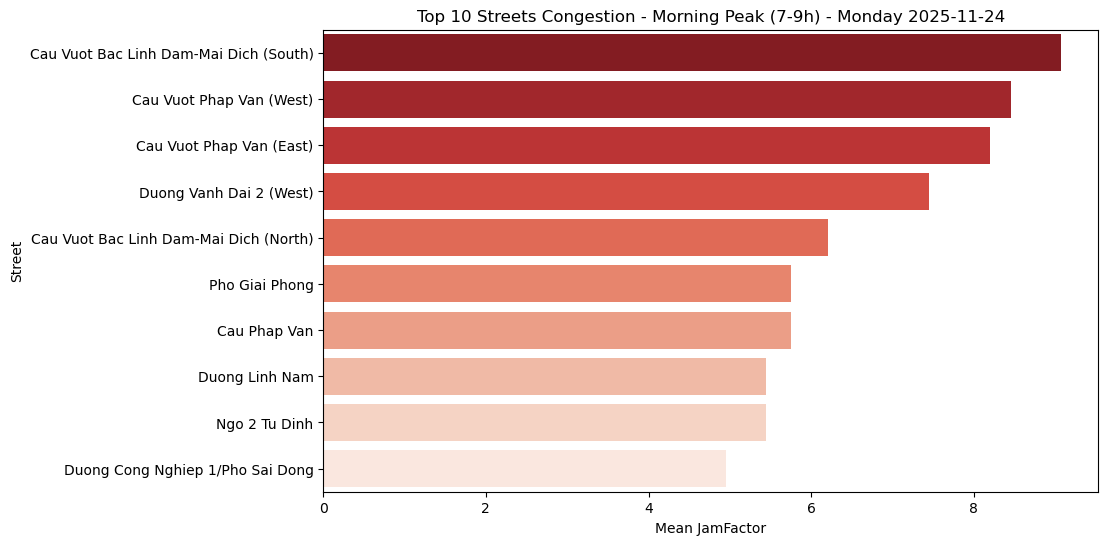

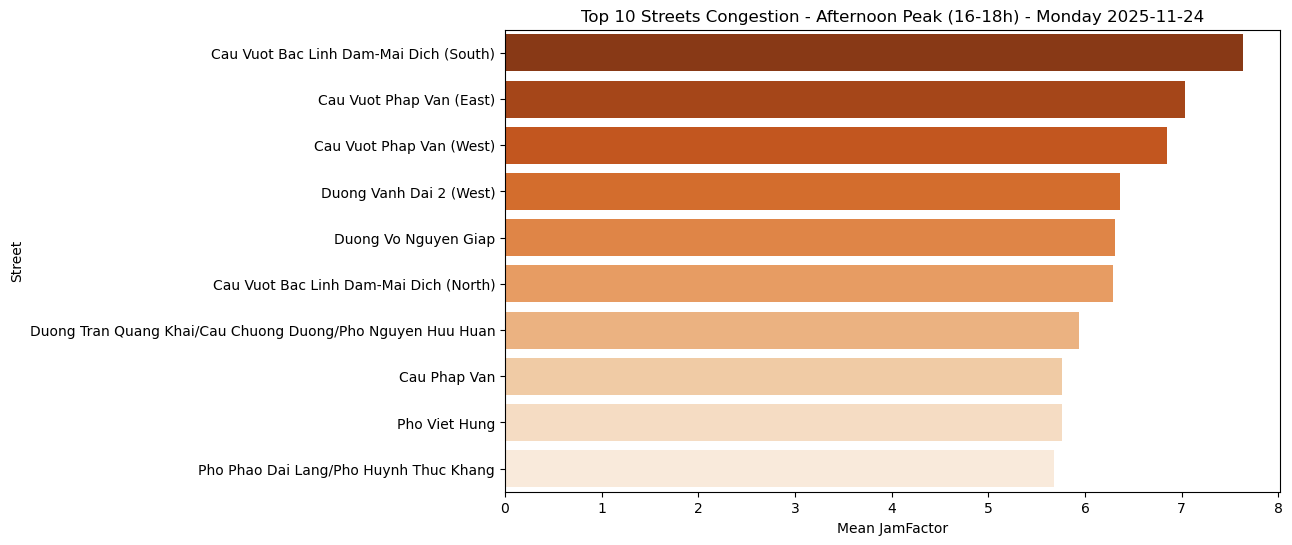

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df đã có cột 'dtime_hanoi', 'hour', 'weekday', 'Street', 'jamFactor', 'date'

#  Chọn ngày thứ 2 cụ thể
day_of_interest = pd.to_datetime("2025-10-27").date()
df_day = df[df['date'] == day_of_interest]

#Morning peak 7-9h
df_morning = df_day[(df_day['hour'] >= 7) & (df_day['hour'] <= 9)]

# Afternoon peak 16-18h
df_afternoon = df_day[(df_day['hour'] >= 16) & (df_day['hour'] <= 18)]

# Tính top 10 tuyến đường tắc nghẽn (mean jamFactor)
top_morning = df_morning.groupby('Street')['jamFactor'].mean().sort_values(ascending=False).head(10)
top_afternoon = df_afternoon.groupby('Street')['jamFactor'].mean().sort_values(ascending=False).head(10)

#Vẽ biểu đồ
# Morning peak
plt.figure(figsize=(10,6))
sns.barplot(x=top_morning.values, y=top_morning.index, palette='Reds_r')
plt.xlabel('Mean JamFactor')
plt.ylabel('Street')
plt.title('Top 10 Streets Congestion - Morning Peak (7-9h) - Monday 2025-11-24')
plt.show()

# Afternoon peak
plt.figure(figsize=(10,6))
sns.barplot(x=top_afternoon.values, y=top_afternoon.index, palette='Oranges_r')
plt.xlabel('Mean JamFactor')
plt.ylabel('Street')
plt.title('Top 10 Streets Congestion - Afternoon Peak (16-18h) - Monday 2025-11-24')
plt.show()


Tuyến đường tắc nghẽn nhất: 'Cau Vuot Phap Van (West)' với JamFactor trung bình = 5.71


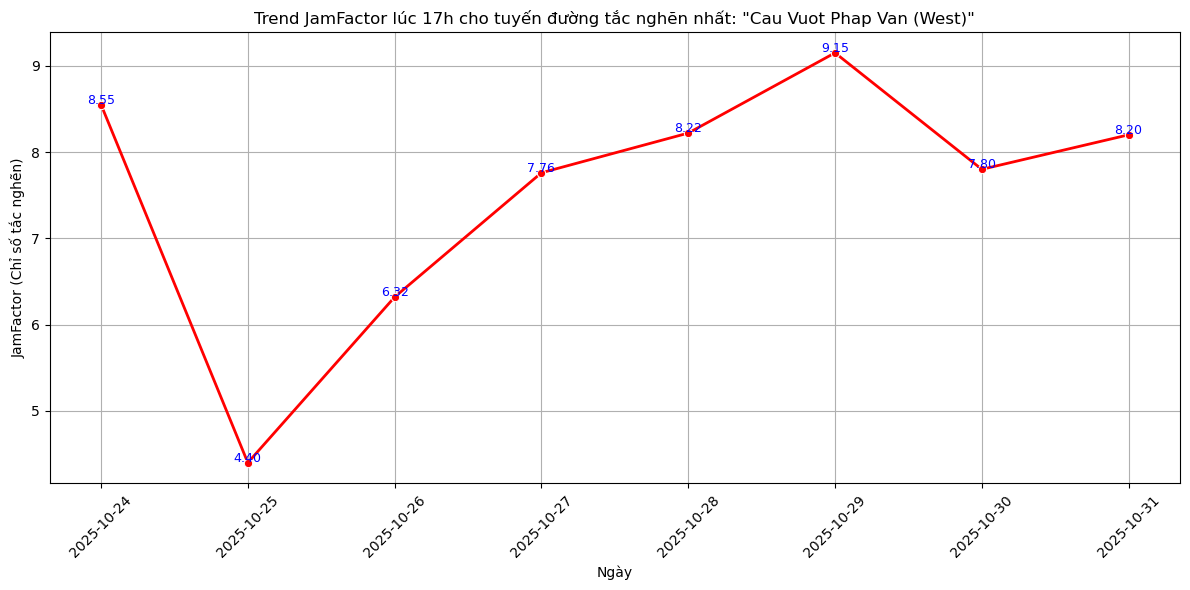

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Xác định tuyến đường tắc nghẽn nhất
street_jam = df.groupby('Street')['jamFactor'].mean().sort_values(ascending=False)
top_street = street_jam.index[0]
top_jam_value = street_jam.iloc[0]
print(f"Tuyến đường tắc nghẽn nhất: '{top_street}' với JamFactor trung bình = {top_jam_value:.2f}")

#Lọc dữ liệu cho tuyến đường đó và khung giờ 17hhour_of_day = 17  # ví dụ 17h
df_top_hour = df[(df['Street'] == top_street) & (df['hour'] == hour_of_day)]

# Nhóm theo ngày, tính mean jamFactor
jam_per_day = df_top_hour.groupby('date')['jamFactor'].mean().reset_index()


#  Vẽ biểu đồ đường cong (line plot)
plt.figure(figsize=(12,6))
sns.lineplot(data=jam_per_day, x='date', y='jamFactor', marker='o', color='red', linewidth=2, markersize=6)

# Chú thích
plt.xlabel('Ngày')
plt.ylabel('JamFactor (Chỉ số tắc nghẽn)')
plt.title(f'Trend JamFactor lúc {hour_of_day}h cho tuyến đường tắc nghẽn nhất: "{top_street}"')
plt.xticks(rotation=45)
plt.grid(True)

# Dán giá trị từng điểm
for x, y in zip(jam_per_day['date'], jam_per_day['jamFactor']):
    plt.text(x, y + 0.01, f"{y:.2f}", ha='center', fontsize=9, color='blue')

plt.tight_layout()
plt.show()


Hai tuyến đường tắc nghẽn nhất: ['Cau Vuot Phap Van (West)', 'Cau Khe Hoi/Cau Vuot Thuong Tin']


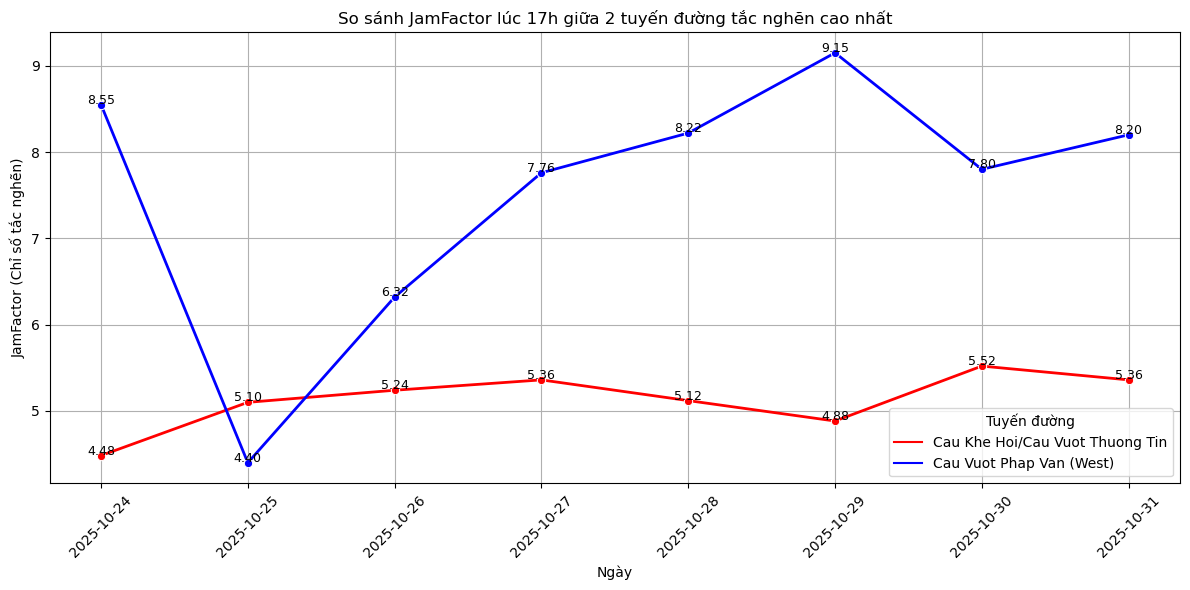

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


#  Xác định 2 tuyến đường tắc nghẽn nhất
street_jam = df.groupby('Street')['jamFactor'].mean().sort_values(ascending=False)
top2_streets = street_jam.index[:2]  # lấy 2 tuyến cao nhất
print("Hai tuyến đường tắc nghẽn nhất:", list(top2_streets))

#  Lọc dữ liệu cho 2 tuyến và khung giờ 17h
hour_of_day = 17
df_top2 = df[(df['Street'].isin(top2_streets)) & (df['hour'] == hour_of_day)]

#  Nhóm theo ngày và tuyến đường
jam_per_day = df_top2.groupby(['Street', 'date'])['jamFactor'].mean().reset_index()

#  Vẽ biểu đồ line chart so sánh
plt.figure(figsize=(12,6))
sns.lineplot(data=jam_per_day, x='date', y='jamFactor', hue='Street', marker='o', linewidth=2, markersize=6, palette=['red','blue'])

# Chú thích
plt.xlabel('Ngày')
plt.ylabel('JamFactor (Chỉ số tắc nghẽn)')
plt.title(f'So sánh JamFactor lúc {hour_of_day}h giữa 2 tuyến đường tắc nghẽn cao nhất')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tuyến đường')

# Dán giá trị từng điểm
for i, row in jam_per_day.iterrows():
    plt.text(row['date'], row['jamFactor'] + 0.01, f"{row['jamFactor']:.2f}", fontsize=9, color='black', ha='center')

plt.tight_layout()
plt.show()


Topp3 tuyến đường có sự tắc đột ngột: ['Cau Vuot Bac Linh Dam-Mai Dich (South)', 'Pho Thach Ban', 'Duong Khuong Dinh']


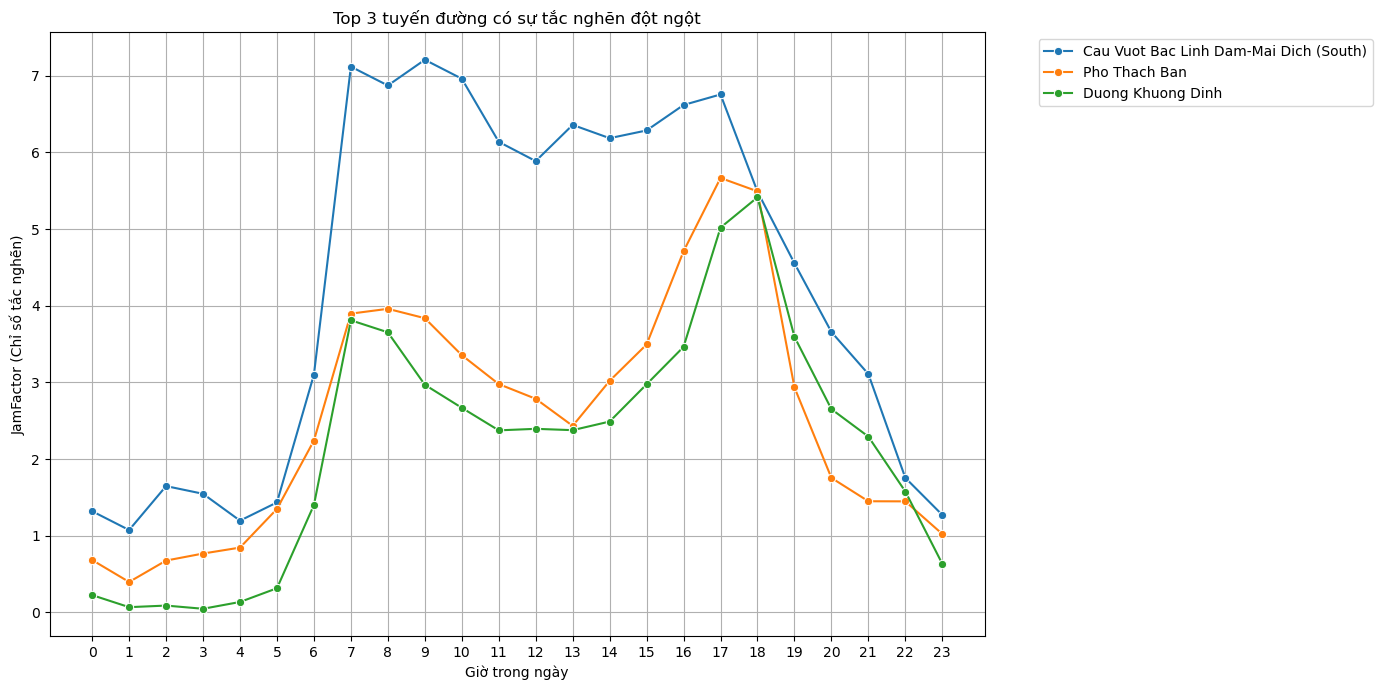

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo Street và hour, tính mean JamFactor
df_hourly = df.groupby(['Street','hour'])['jamFactor'].mean().reset_index()

#  Tính biến động (diff giữa các giờ liên tiếp)
df_hourly['jam_diff'] = df_hourly.groupby('Street')['jamFactor'].diff().abs()

#  Chọn topp3 tuyến có biến động lớn nhất
# Tính max diff mỗi tuyến
street_max_diff = df_hourly.groupby('Street')['jam_diff'].max().sort_values(ascending=False)
top3_spike_streets = street_max_diff.head(3).index
print("Topp3 tuyến đường có sự tắc đột ngột:", list(top3_spike_streets))

# Vẽ biểu đồ line cho topp3 tuyến
plt.figure(figsize=(14,7))
for street in top3_spike_streets:
    tmp = df_hourly[df_hourly['Street']==street]
    sns.lineplot(data=tmp, x='hour', y='jamFactor', marker='o', label=street)

plt.xlabel('Giờ trong ngày')
plt.ylabel('JamFactor (Chỉ số tắc nghẽn)')
plt.title('Top 3 tuyến đường có sự tắc nghẽn đột ngột')
plt.xticks(range(0,24))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top 3 tuyến đường tắc nghẽn nhất: ['Cau Vuot Phap Van (West)', 'Cau Khe Hoi/Cau Vuot Thuong Tin', 'Duong Vanh Dai 2 (West)']


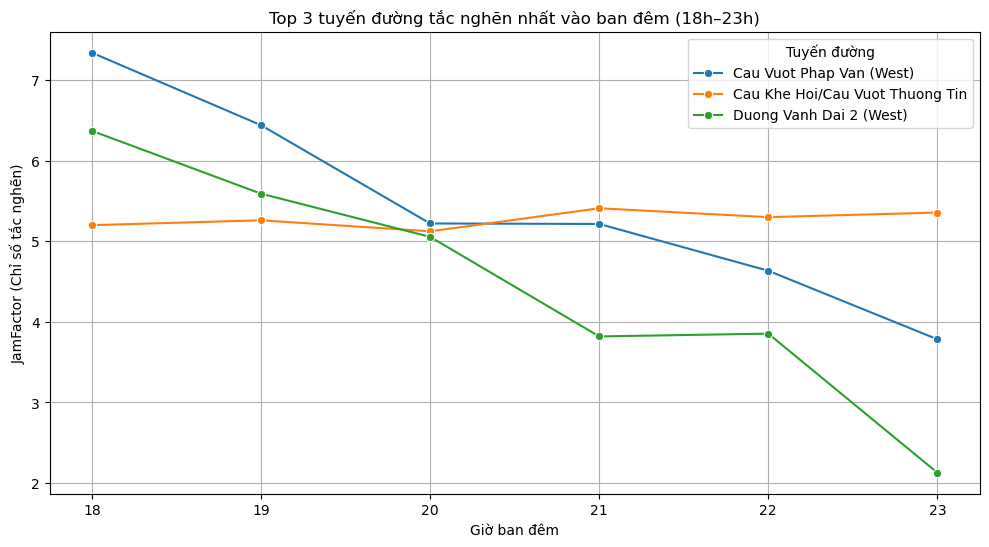

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Xác định top 3 tuyến đường tắc nghẽn nhất
street_jam = df.groupby('Street')['jamFactor'].mean().sort_values(ascending=False)
top3_streets = street_jam.head(3).index
print("Top 3 tuyến đường tắc nghẽn nhất:", list(top3_streets))

# Lọc dữ liệu cho khung giờ ban đêm (ví dụ 18h đến 23h)
night_df = df[(df['hour'] >= 18) & (df['hour'] <= 23) & (df['Street'].isin(top3_streets))]

#Nhóm theo giờ và tuyến, tính trung bình JamFactor
night_hourly = night_df.groupby(['Street','hour'])['jamFactor'].mean().reset_index()

# Vẽ biểu đồ line chart
plt.figure(figsize=(12,6))
for street in top3_streets:
    tmp = night_hourly[night_hourly['Street']==street]
    sns.lineplot(data=tmp, x='hour', y='jamFactor', marker='o', label=street)

plt.xlabel('Giờ ban đêm')
plt.ylabel('JamFactor (Chỉ số tắc nghẽn)')
plt.title('Top 3 tuyến đường tắc nghẽn nhất vào ban đêm (18h–23h)')
plt.xticks(range(18,24))
plt.grid(True)
plt.legend(title='Tuyến đường')
plt.show()



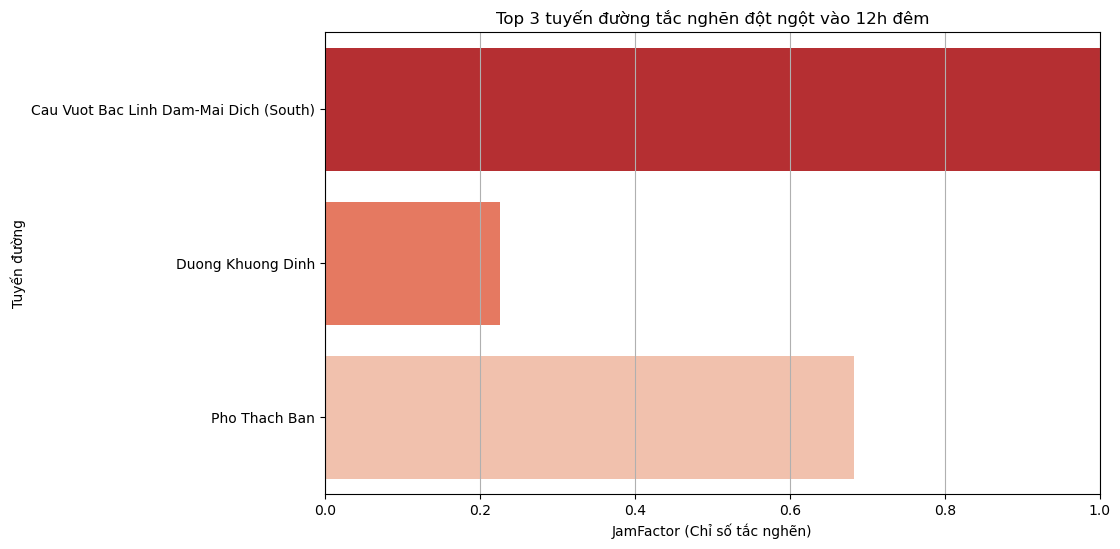

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu cho top 3 tuyến và khung giờ 0h–1h
night_df = df[(df['Street'].isin(top3_spike_streets)) & (df['hour'] == 0)]

# Nếu muốn mở rộng 0h–1h, có thể dùng: (df['hour'].isin([0,1]))

# Nhóm theo Street, tính mean JamFactor
night_hourly = night_df.groupby('Street')['jamFactor'].mean().reset_index()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=night_hourly, x='jamFactor', y='Street', palette='Reds_r')

plt.xlabel('JamFactor (Chỉ số tắc nghẽn)')
plt.ylabel('Tuyến đường')
plt.title('Top 3 tuyến đường tắc nghẽn đột ngột vào 12h đêm')
plt.xlim(0,1)  # vì JamFactor = 0-1
plt.grid(axis='x')
plt.show()


Top 3 tuyến đường tắc nghẽn nhất vào 17h: ['Cau Vuot Phap Van (West)', 'Duong Vanh Dai 2 (West)', 'Cau Vuot Phap Van (East)']


/var/folders/tt/pwtcb9011g70jp8w_ht88sp40000gn/T/ipykernel_40567/3314319446.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overnight_top3['hour_continuous'] = df_overnight_top3['hour'].apply(lambda x: x if x>=19 else x+24)


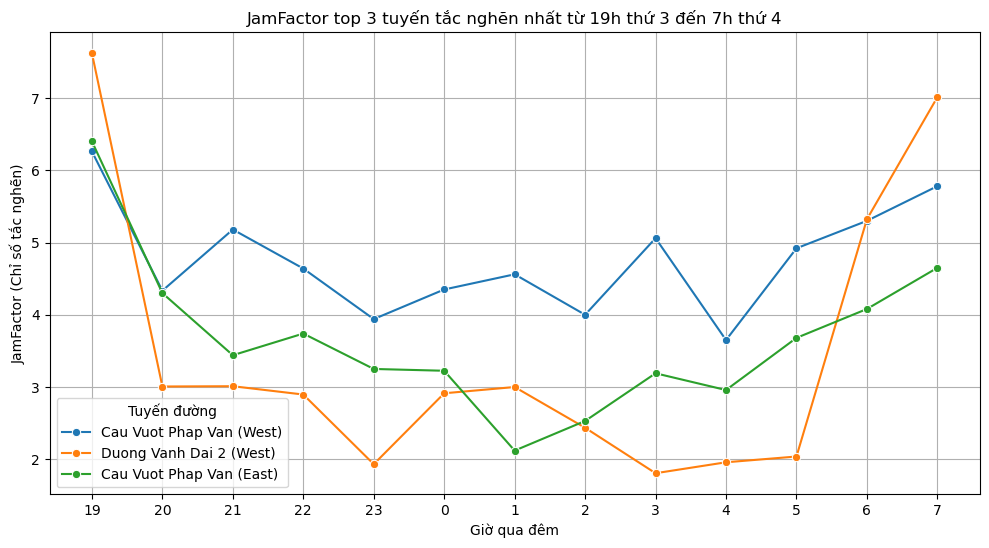

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1Xác định top 3 tuyến tắc nghẽn nhất vào 17h
df_17h = df[df['hour'] == 17]
top3_streets = df_17h.groupby('Street')['jamFactor'].mean().sort_values(ascending=False).head(3).index
print("Top 3 tuyến đường tắc nghẽn nhất vào 17h:", list(top3_streets))

# Lọc dữ liệu ngày thứ 3 (Tuesday) và thứ 4 (Wednesday) cho qua đêm
df_tuesday = df[df['weekday'] == 'Tuesday']
df_wednesday = df[df['weekday'] == 'Wednesday']

# Khung giờ qua đêm: 19-23h thứ 3, 0-7h thứ 4
evening = df_tuesday[(df_tuesday['hour'] >= 19) & (df_tuesday['hour'] <= 23)]
morning = df_wednesday[(df_wednesday['hour'] >= 0) & (df_wednesday['hour'] <= 7)]

# Kết hợp dữ liệu
df_overnight = pd.concat([evening, morning])

# Chỉ lấy top 3 tuyến
df_overnight_top3 = df_overnight[df_overnight['Street'].isin(top3_streets)]


# Tạo cột hour_continuous để sắp xếp liên tục 19->23, 24->31 (0->7h sáng)
df_overnight_top3['hour_continuous'] = df_overnight_top3['hour'].apply(lambda x: x if x>=19 else x+24)


# Nhóm theo tuyến và giờ liên tục, tính mean JamFactor
df_overnight_hourly = df_overnight_top3.groupby(['Street','hour_continuous'])['jamFactor'].mean().reset_index()


# Vẽ line chart
plt.figure(figsize=(12,6))
for street in top3_streets:
    tmp = df_overnight_hourly[df_overnight_hourly['Street'] == street]
    sns.lineplot(data=tmp, x='hour_continuous', y='jamFactor', marker='o', label=street)

# Trục x hiển thị giờ bình thường 19->23, 0->7
xticks_labels = list(range(19,24)) + list(range(0,8))
xticks_pos = list(range(19,24)) + list(range(24,32))
plt.xticks(xticks_pos, xticks_labels)

plt.xlabel('Giờ qua đêm')
plt.ylabel('JamFactor (Chỉ số tắc nghẽn)')
plt.title('JamFactor top 3 tuyến tắc nghẽn nhất từ 19h thứ 3 đến 7h thứ 4')
plt.grid(True)
plt.legend(title='Tuyến đường')
plt.show()



=== SAMPLE DATA AFTER CLEANING ===
                dtime_hanoi                           district  \
0 2025-10-24 16:03:31+07:00  105.8402,21.0192,105.8631,21.0408   
1 2025-10-24 16:03:31+07:00  105.8402,21.0192,105.8631,21.0408   
2 2025-10-24 16:03:31+07:00  105.8402,21.0192,105.8631,21.0408   
3 2025-10-24 16:03:31+07:00  105.8402,21.0192,105.8631,21.0408   
4 2025-10-24 16:03:31+07:00  105.8402,21.0192,105.8631,21.0408   

                              Street      speed  speedUncapped   freeFlow  \
0                     Pho Ly Thai To  10.000001      10.000001  16.000001   
1  Pho Nguyen Tri Phuong/Pho Cua Bac  17.000000      17.000000  28.000001   
2   Pho Tran Hung Dao/Pho Han Thuyen  15.000001      15.000001  18.000000   
3                 Pho Phan Chu Trinh  11.000000      11.000000  15.000001   
4               Pho Hang Ca/Ngo Gach  10.000001      10.000001  12.000001   

   jamFactor  confidence traversability  hour        date  weekday  \
0        3.2        0.71          

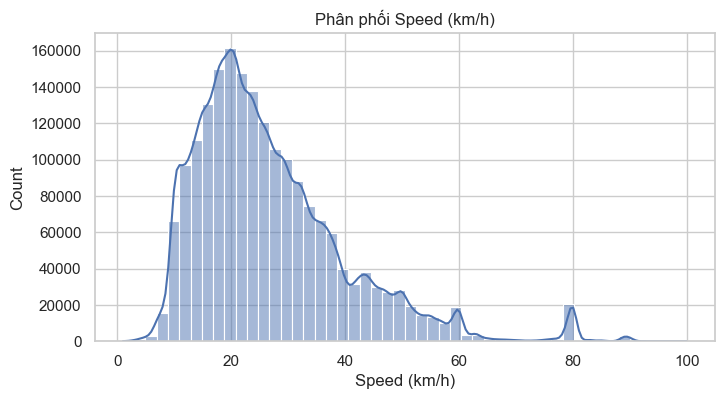

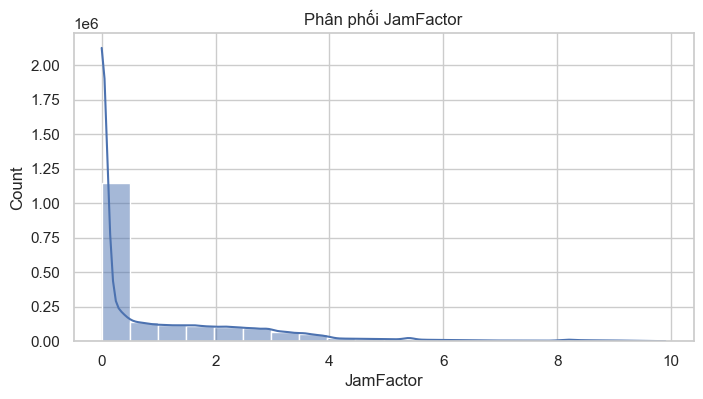

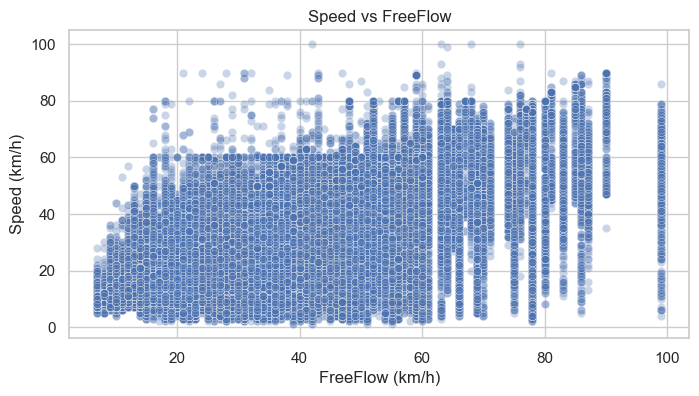

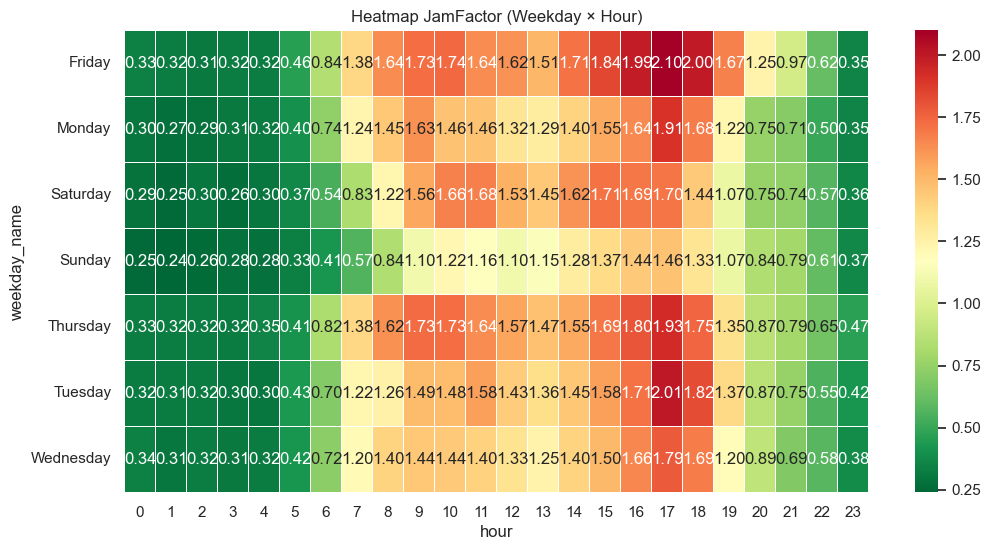

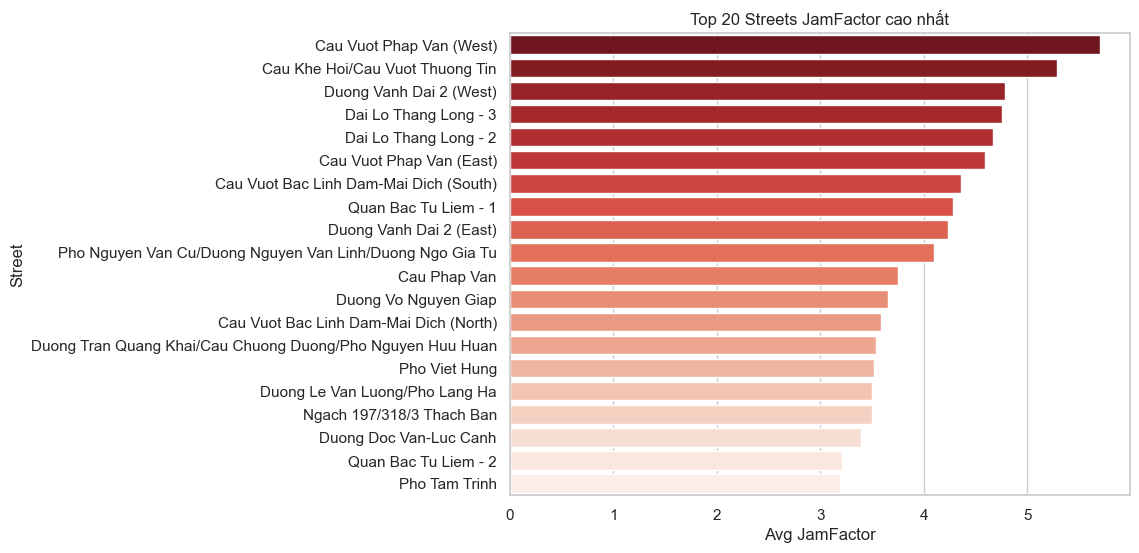

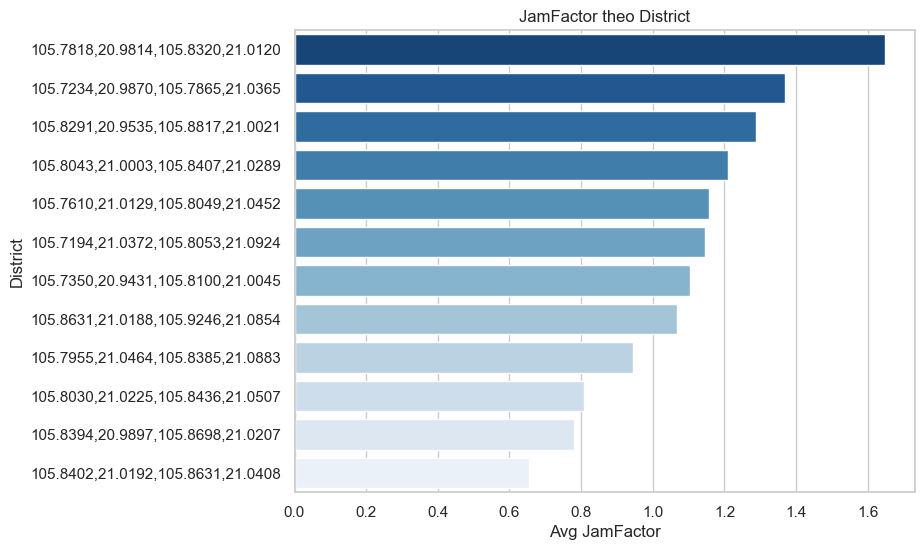

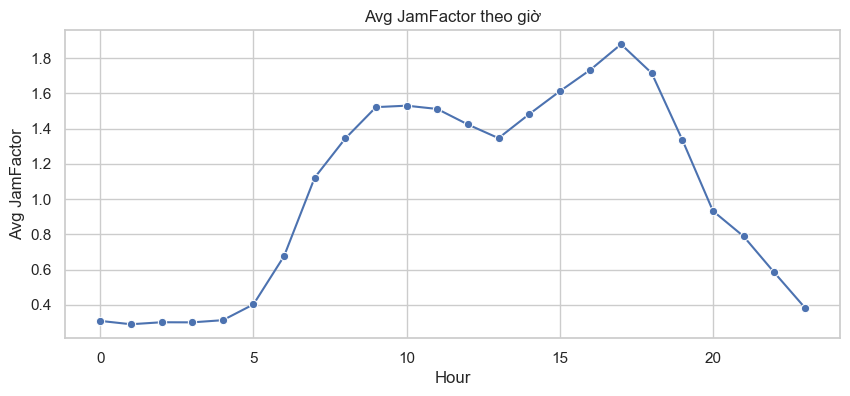

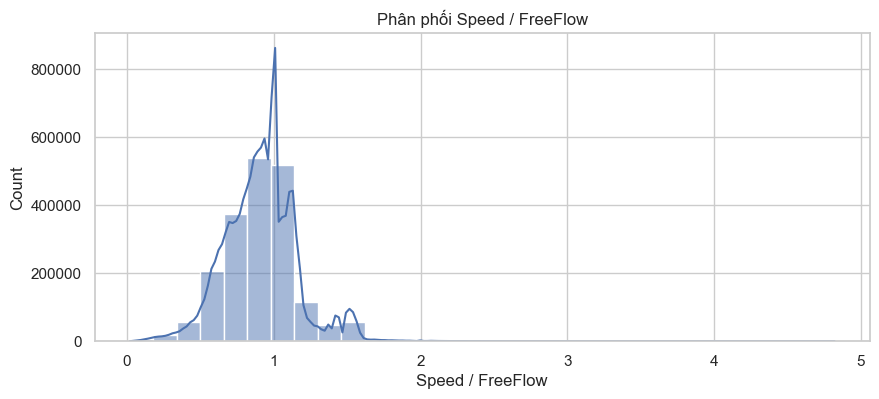

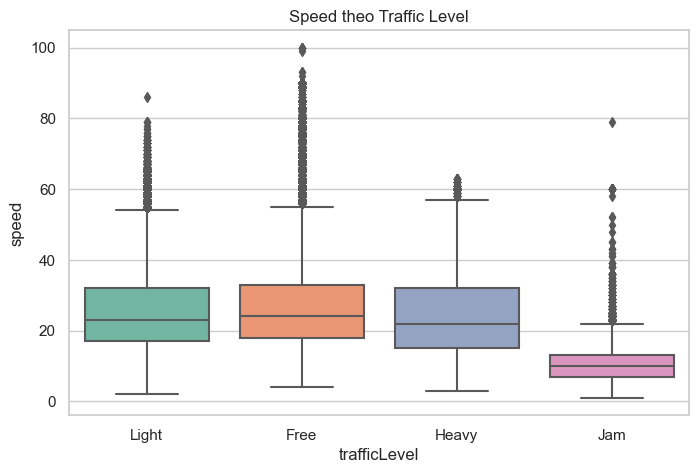


✓ DONE! File đã được lưu thành: hanoi_traffic_cleaned_unit.csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. DETAIS DATA
#dtime_hanoi là thời gian đo, đã được chuyển sang múi giờ Hà Nội (UTC+7)
#district là tọa độ polygon đại diện khu vực (bounding box) mà HERE Map quy định cho đoạn đường
#Street là tên đường 
#speed là tốc độ thực tế của đoạn đường tại thời điểm ghi nhận (km/h sau khi bạn convert)
#speedUncapped là tốc độ thực tế chưa bị giới hạn bởi các thuật toán smoothing của HERE.
#FreeFlow là tốc độ ước tính đạt được lúc đường thông thoáng không tắc nghẽn/ nhưng ở 1 số tuyến tốc độ có thể cao hơn freeFlow
#jamFactor là mức độ tắc đường từ 0->10 càng cao thì càng tắc
#confidence là mức độ độ tin cậy của dữ liệu tốc độ. Giá trị từ 0 → 1 , 1 = độ tin cậy cao, 0 = thấp.
#traversability là tình trạng khả năng đi lại, "open" → đường mở , "closed" → đường đóng/cấm,  "difficult" → khó đi
#hour là giờ trong ngày
#date là ngày
#weekday là thứ trong tuần bằng số
#weekday_name là thứ trong tuần bằng chữ
#===========================================
#trafficLevel là mức độ tắc đường được phân loại từ jamFactor. 
# <2 → Free(Giao thông thông thoáng, không có tắc nghẽn),
# <5 → Light(Tắc nhẹ, xe di chuyển chậm hơn hay còn gọi là ùn), 
# <8 → Heavy, >=8 → Jam (Tắc cứng, xe gần như không di chuyển được)
#=========================================
#speed_ratio là tỉ lệ tốc độ thực tế / tốc độ lý tưởng, speed_ratio = speed / freeFlow
#speed_loss giảm tốc độ do tắc đường, speed_loss = freeFlow - speed

#Tóm tắt ý nghĩa data
#Lúc 16:03 ngày 24/10/2025, trên Phố Lý Thái Tổ, xe chạy với tốc độ 10 km/h, thấp hơn tốc độ thông thoáng là 16 km/h
#JamFactor 3.2 → tắc nhẹ, đường open, dữ liệu tin cậy 71%, thuộc khu vực tọa độ đã cho.
#Tốc độ bị giảm là 6 km/h, tốc độ chỉ đạt 63% tốc độ lý tưởng.




df = pd.read_csv("hanoi_traffic_data_full.csv")

# Loại bỏ cột trống
df = df.dropna(axis=1, how='all')

# Loại bỏ trùng lặp
df = df.drop_duplicates()

# Loại bỏ street trống hoặc Unknown
df = df[~df['Street'].isna() & (df['Street'] != "Unknown")]

# Loại bỏ speed và jamFactor lỗi
df = df[df['speed'].notna() & (df['speed'] >= 0)]
df = df[df['jamFactor'].notna() & (df['jamFactor'] >= 0) & (df['jamFactor'] <= 10)]
df = df[df['speedUncapped'].notna() & (df['speedUncapped'] >= 0)]
df = df[df['freeFlow'].notna() & (df['freeFlow'] >= 0)]

# ================================================================
# 3. QUY ĐỔI ĐƠN VỊ (giả sử m/s → km/h)
# ================================================================
df['speed'] = df['speed'] * 3.6
df['speedUncapped'] = df['speedUncapped'] * 3.6
df['freeFlow'] = df['freeFlow'] * 3.6



# ================================================================
# 4. XỬ LÝ THỜI GIAN
# ================================================================
df['dtime'] = pd.to_datetime(df['dtime'], errors="coerce")
df = df.dropna(subset=['dtime'])

# Nếu dtime đã có timezone → convert
# Nếu chưa có timezone → localize UTC trước rồi convert
if df['dtime'].dt.tz is None:
    df['dtime'] = df['dtime'].dt.tz_localize("UTC").dt.tz_convert("Asia/Ho_Chi_Minh")
else:
    df['dtime'] = df['dtime'].dt.tz_convert("Asia/Ho_Chi_Minh")

df = df.rename(columns={"dtime": "dtime_hanoi"})

# ================================================================
# 5. TẠO CÁC CỘT GIỜ, NGÀY, THỨ
# ================================================================
df["hour"] = df["dtime_hanoi"].dt.hour
df["date"] = df["dtime_hanoi"].dt.date
df["weekday"] = df["dtime_hanoi"].dt.weekday  # số 0–6
weekday_map = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday_name"] = df["weekday"].map(lambda x: weekday_map[x])

# ================================================================
# 6. TẠO CỘT EDA
# ================================================================
# Mức độ tắc đường
def traffic_level(jf):
    if jf < 2: 
        return "Free"   #Giao thông thông thoáng, không có tắc nghẽn
    elif jf < 5:  
        return "Light" #Tắc nhẹ, xe di chuyển chậm hơn hay còn gọi là ùn
    elif jf < 8:
        return "Heavy"   #Tắc nặng, lưu lượng giao thông lớn, tốc độ giảm đáng kể
    else:
        return "Jam"    #Tắc cứng, xe gần như không di chuyển được

df["trafficLevel"] = df["jamFactor"].apply(traffic_level)

# Tỉ lệ tốc độ so với freeFlow
df["speed_ratio"] = df["speed"] / df["freeFlow"]

# Tổn thất tốc độ (âm → gán thành 0)
df["speed_loss"] = (df["freeFlow"] - df["speed"]).clip(lower=0)



# ================================================================
# 7. KIỂM TRA DỮ LIỆU
# ================================================================
print("\n=== SAMPLE DATA AFTER CLEANING ===")
print(df.head())

print("\n=== MISSING VALUES ===")
print(df.isna().sum())

print("\n=== BASIC STATS ===")
print(df.describe())


# XỬ LÝ SAU DÂU
cols_to_round = ['speed', 'speedUncapped', 'freeFlow', 'speed_ratio', 'speed_loss', 'jamFactor']
for col in cols_to_round:
    df[col] = df[col].round(2)

# ================================================================
#  EDA
# ================================================================
sns.set(style="whitegrid")

#  Phân phối speed
plt.figure(figsize=(8,4))
sns.histplot(df['speed'], bins=50, kde=True)
plt.title("Phân phối Speed (km/h)")
plt.xlabel("Speed (km/h)")
plt.ylabel("Count")
plt.show()

#  Phân phối jamFactor
plt.figure(figsize=(8,4))
sns.histplot(df['jamFactor'], bins=20, kde=True)
plt.title("Phân phối JamFactor")
plt.xlabel("JamFactor")
plt.ylabel("Count")
plt.show()

# Scatter speed vs freeFlow
plt.figure(figsize=(8,4))
sns.scatterplot(x='freeFlow', y='speed', data=df, alpha=0.3)
plt.title("Speed vs FreeFlow")
plt.xlabel("FreeFlow (km/h)")
plt.ylabel("Speed (km/h)")
plt.show()

# Heatmap jamFactor theo giờ × weekday
pivot = df.pivot_table(index='weekday_name', columns='hour', values='jamFactor', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Heatmap JamFactor (Weekday × Hour)")
plt.show()

# Top 20 streets jamFactor cao nhất
top_streets = df.groupby('Street')['jamFactor'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=top_streets.values, y=top_streets.index, palette="Reds_r")
plt.title("Top 20 Streets JamFactor cao nhất")
plt.xlabel("Avg JamFactor")
plt.ylabel("Street")
plt.show()

# JamFactor theo district
district_jam = df.groupby('district')['jamFactor'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=district_jam.values, y=district_jam.index, palette="Blues_r")
plt.title("JamFactor theo District")
plt.xlabel("Avg JamFactor")
plt.ylabel("District")
plt.show()

# Avg jamFactor theo giờ
hour_jam = df.groupby('hour')['jamFactor'].mean()
plt.figure(figsize=(10,4))
sns.lineplot(x=hour_jam.index, y=hour_jam.values, marker='o')
plt.title("Avg JamFactor theo giờ")
plt.xlabel("Hour")
plt.ylabel("Avg JamFactor")
plt.show()

# Phân phối speed_ratio
plt.figure(figsize=(10,4))
sns.histplot(df['speed_ratio'], bins=30, kde=True)
plt.title("Phân phối Speed / FreeFlow")
plt.xlabel("Speed / FreeFlow")
plt.ylabel("Count")
plt.show()

# Boxplot speed theo trafficLevel
plt.figure(figsize=(8,5))
sns.boxplot(x='trafficLevel', y='speed', data=df, palette="Set2")
plt.title("Speed theo Traffic Level")
plt.show()

# ================================================================
#  LƯU FILE DỮ LIỆU SẠCH
# ================================================================
df.to_csv("hanoi_traffic_cleaned_unit.csv", index=False)
print("\n✓ DONE! File đã được lưu thành: hanoi_traffic_cleaned_unit.csv")


In [6]:
import pandas as pd

df = pd.read_csv("hanoi_traffic_cleaned.csv")

# Kích thước dữ liệu
print("Số dòng, cột:", df.shape)

# Các cột
print(df.columns)

# Thống kê cơ bản
print(df.describe())

# Kiểm tra missing values
print(df.isna().sum())


Số dòng, cột: (1944124, 16)
Index(['dtime_hanoi', 'district', 'Street', 'speed', 'speedUncapped',
       'freeFlow', 'jamFactor', 'confidence', 'traversability', 'hour', 'date',
       'weekday', 'weekday_name', 'trafficLevel', 'speed_ratio', 'speed_loss'],
      dtype='object')
              speed  speedUncapped      freeFlow     jamFactor    confidence  \
count  1.944124e+06   1.944124e+06  1.944124e+06  1.944124e+06  1.944124e+06   
mean   7.435958e+00   7.439561e+00  8.493504e+00  1.051467e+00  7.776600e-01   
std    3.714188e+00   3.723705e+00  4.034806e+00  1.657989e+00  9.841952e-02   
min    2.777778e-01   2.777778e-01  1.944444e+00  0.000000e+00  7.000000e-01   
25%    4.722222e+00   4.722222e+00  5.555556e+00  0.000000e+00  7.000000e-01   
50%    6.666667e+00   6.666667e+00  7.777778e+00  1.000000e-01  7.100000e-01   
75%    9.166667e+00   9.166667e+00  1.055556e+01  1.700000e+00  8.700000e-01   
max    2.777778e+01   3.361111e+01  2.750000e+01  9.900000e+00  9.900000e-01   
